# Deutsch Jozsa Algorithm
It helps in determining if an oracle is balanced or constant. 

### What is balanced and constant oracle? 
Assume a functional black-box ($U_f$), it takes a bit string as input and returns a bit string as output. If the output contains same bit regardless of any input then it's considered as a constant oracle and if the output has half the bits in one state $\ket{0}$ and half in another state $\ket{1}$, that is the balanced oracle. 

### What's an Oracle? 
Oracle is a functional black box ($U_f$) and that is unitary, that means it needs to be reversible and maintain original input. If I send an input qubit $q_0 = \ket{x}$ and second ancillary qubit $q_1 = \ket{y}$ in $\ket{-}$ state, the input qubit stays as it is $\ket{x}$ and the oracle's $f(x)$ is applied to ancillary qubit with XOR gate $\left(\ket{y} \oplus f(x) \right)$. Ancillary qubit being in $\ket{-}$ state, it kicks back the phase to $q_0$ which makes it a phase oracle. XOR gate is essentially a cx gate in quantum computing. If $\ket{y} = \ket{0}$ then it would be called a bit flip oracle.

## Hadamard Gate
My intuitive understanding of hadamard is that if it's applied to an input qubit, it adds an interference pattern that puts it in a quantum superposition. In Deutsch and Deutsch-Jozsa algorithm we are applying it twice, once before the oracle and the other one afterwards. The first H gate puts the input qubit in superposition (interference pattern added) so that oracle resolves all possibilities and last H gate decodes that intereference induced result (destructive interference). <br><br>
Understand Hadamard (computational basis)
$$
\begin{equation*}
\begin{aligned}

\ket{H|x} &= \frac{1}{\sqrt{2}} \left[ (-1)^{x.y} \ket{0} + (-1)^{x.y} \ket{1} \right] \\

\ket{H|x} &=
\begin{cases}
\frac{1}{\sqrt{2}} \left[ \ket{0} + \ket{1} \right], & x = \ket{0} \\
\frac{1}{\sqrt{2}} \left[ \ket{0} - \ket{1} \right], & x = \ket{1}
\end{cases} \\

\ket{H|x} &= \frac{1}{\sqrt{2}} \sum_{y \epsilon\{0, 1\}} (-1)^{x.y} \ket{y} \\

\textbf{To generalise the Hadamard for n values: } \\

\ket{H^{\otimes n}|x^{\otimes n}} &= \frac{1}{\sqrt{2^n}} \sum_{y \epsilon\{0, 1\}^n} (-1)^{x.y} \ket{y} \\

\textbf{Assume that the state x is n times 0 state: } \\

\ket{H^{\otimes n}|0^{\otimes n}} &= \frac{1}{\sqrt{2^n}} \sum_{y \epsilon\{0, 1\}^n} (-1)^{0.y} \ket{y} \\
&= \frac{1}{\sqrt{2^n}} \sum_{y \epsilon\{0, 1\}^n} (-1)^0 \ket{y} \\
&= \frac{1}{\sqrt{2^n}} \sum_{y \epsilon\{0, 1\}^n} \ket{y} \\

\end{aligned}
\end{equation*}
$$

### Note: 
- When working with **Deutsch algorithm**, we are dealing with only one input bit to figure out if oracle is constant or balanced. We put that one qubit in superposition using hadamard gate to verify both possibilities and then send it to oracle to verify the output type (it's either $\ket{+} or \ket{-}$). After the oracle the output is returned in $\pm 1$ phase. And last hadamard extracts the result from that phase. 
- Quantum computer may consider all possible states at once but the moment we do measurement that superposition state collapses. So the target of any quantum algorithm is to extract as much information as possible from those superposition states before collapse.

## Deutsch Jozsa algorithm
Here we are dealing n qubits. Instead of estimating the exact output of black-box oracle we intend to only find if oracle is balanced or constant. Assume we send n qubits in $\ket{0}$ state and apply similar circuit as in Deutsch algorithm but ensure that last hadamard is applied to all input qubits. The final state will be the one with a lot of interference states. Now this interference's impact on probability amplitude will help us figure out if the oracle is constant or balanced. 
<br>
Before the measurement, those n input qubits might be in superposition of $2^n$, states. Out of those $2^n$ states, I narrow down the algorithm to just consider the state where all outputs are assumed to be in $\ket{0}$ state. If there's constructive interference then the amplitude of that state will be $\pm 1$, if there's balanced state then half the amplitude will be in +1 and other half in -1 state hence overall amplitudes interfere to make it 0, which means the probability of measuring $\ket{0}^{\otimes n}$ state is 0. 
<br>
Basically we are fixing one expected outcome, which in our case is $\ket{0}^{\otimes n}$, if the $f(x)$ is constant then we get constructive interference and if it's balanced then the probability of measuring the $\ket{0}^{\otimes n}$ is 0

## Deutsch Jozsa

Assume we have n qubits in $\ket{0}^{\otimes n}$ and last qubit in state $\ket{-}$

$$
\begin{equation*}
\begin{aligned}

\ket{\Psi_0} &= \ket{0}^{\otimes n} \ket{-} \\

\textbf{Apply } H^{\otimes n} \textbf{ to all } \ket{0}^{\otimes n} \\

\ket{\Psi_1} &= H^{\otimes n} \ket{0}^{\otimes n} \ket{-} \\
&= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0, 1\}^n} \ket{x} \ket{-} \\

\textbf{Apply } U_f \textbf{ oracle} \\

\ket{\Psi_2} &= U_f \otimes \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0, 1\}^n} \ket{x} \ket{-} \\
&= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0, 1\}^n} U_f \ket{x} \ket{-} \\

\textbf{*Phase oracle} \\
U_f\ket{x} \ket{-} &= (-1)^{f(x)} \ket{x} \ket{-} \\[6pt]

\textbf{Hence: } \\
\ket{\Psi_2} &= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x)} \ket{x} \ket{-} \\

&= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x)} \ket{x} \\

\textbf{Apply } H^{\otimes n} \textbf{ to all } \ket{x} \\
\ket{\Psi_3} &= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x)} \left[ H^{\otimes n} \ket{x} \right] \\
&= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x)} \left[ \frac{1}{\sqrt{2^n}} \sum_{y \epsilon\{0, 1\}^n} (-1)^{x.y} \ket{y} \right] \\
&= \sum_{y \epsilon\{0, 1\}^n}  \left[ \frac{1}{2^n} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x)} \times (-1)^{x.y} \right] \ket{y} \\
&= \sum_{y \epsilon\{0, 1\}^n}  \left[ \frac{1}{2^n} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x) - x.y} \right] \ket{y} \\

\textbf{Just consider the amplitude for all 0 states} \\
\Phi_0 &= \left[ \frac{1}{2^n} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x) - x.0} \right] \\
&= \left[ \frac{1}{2^n} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x)} \right] \\

\textbf{For Constant f(x)=0} \\
&= \left[ \frac{1}{2^n} \sum_{x \epsilon\{0, 1\}^n} (-1)^{0} \right] \\
&= \left[ \frac{1}{2^n} \sum_{x \epsilon\{0, 1\}^n} 1 \right] \\
&= \left[ \frac{1}{2^n} \times 2^n \right] = 1 \\

\textbf{For Constant f(x)=1} \\
&= \left[ \frac{1}{2^n} \sum_{x \epsilon\{0, 1\}^n} (-1) \right] \\
&= \left[ \frac{1}{2^n} \times 2^n (-1) \right] = -1 \\

\end{aligned}
\end{equation*}
$$

**For balanced f(x), half will be +1 and half will be -1, hence amplitude is 0**


In [45]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer, AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.visualization import plot_histogram
from IPython.display import display

import numpy as np

In [46]:
def const_0(qr_count):
    qr = QuantumRegister(qr_count, 'q')
    qc = QuantumCircuit(qr)
    return qc

def const_1(qr_count):
    qr = QuantumRegister(qr_count, 'q')
    qc = QuantumCircuit(qr)
    qc.x(qr[-1])
    return qc

In [47]:
import random
from typing import Optional, List, Tuple, Dict

def balanced_dummy(qr_count: int,
                                 seed: Optional[int] = None,
                                 a: Optional[List[int]] = None,
                                 b: Optional[int] = None
                                ) -> Tuple[QuantumCircuit, Dict]:
    """
    Return a QuantumCircuit implementing a balanced Deutsch–Jozsa oracle Uf on qr_count qubits.
    - First (qr_count - 1) qubits: input register
    - Last qubit (index qr_count-1): ancilla (target)
    - Implements |x,y> -> |x, y XOR f(x)> with f(x) = a·x XOR b and a != 0 (balanced).
    
    Returns:
        qc   : QuantumCircuit implementing Uf (no prep/measure)
        info : dict { 'a': list(int), 'b': int, 'type': 'balanced' }
    """
    if qr_count < 2:
        raise ValueError("qr_count must be >= 2 (at least one input + one ancilla).")
    n_input = qr_count - 1

    if seed is not None:
        random.seed(seed)

    # choose or validate a (non-zero)
    if a is None:
        while True:
            a = [random.randint(0, 1) for _ in range(n_input)]
            if any(a):
                break
    else:
        if len(a) != n_input:
            raise ValueError("Provided 'a' must have length qr_count - 1.")
        if not any(a):
            raise ValueError("Provided 'a' must be non-zero to guarantee a balanced function.")

    # choose or validate b
    if b is None:
        b = random.randint(0, 1)
    else:
        if b not in (0, 1):
            raise ValueError("b must be 0 or 1.")

    qr = QuantumRegister(qr_count, 'q')
    qc = QuantumCircuit(qr, name="Uf_balanced")

    ancilla = qr_count - 1

    # For each position where a_i == 1, add CNOT(input_i -> ancilla)
    for i, bit in enumerate(a):
        if bit == 1:
            qc.cx(i, ancilla)

    # If b == 1, flip ancilla once
    if b == 1:
        qc.x(ancilla)

    info = {"type": "balanced", "a": a.copy(), "b": int(b)}
    return qc


In [52]:
def deutsch_jozsa(oracle, qr_count):
    qr = QuantumRegister(qr_count, 'q')
    cr = ClassicalRegister(qr_count, 'c')
    qc = QuantumCircuit(qr, cr)

    qc.x(qr[-1])
    
    for qubit in qr:
        qc.h(qubit)

    qc.barrier()

    blackbox = oracle.to_gate()
    blackbox.label = "$U_f$"
    qc = qc.compose(blackbox)

    qc.barrier()

    for qubit in qr[:-1]:
        qc.h(qubit)

    qc.measure(qr[:-1], cr[:-1])

    return qc


constant_0: {'000000': 100}


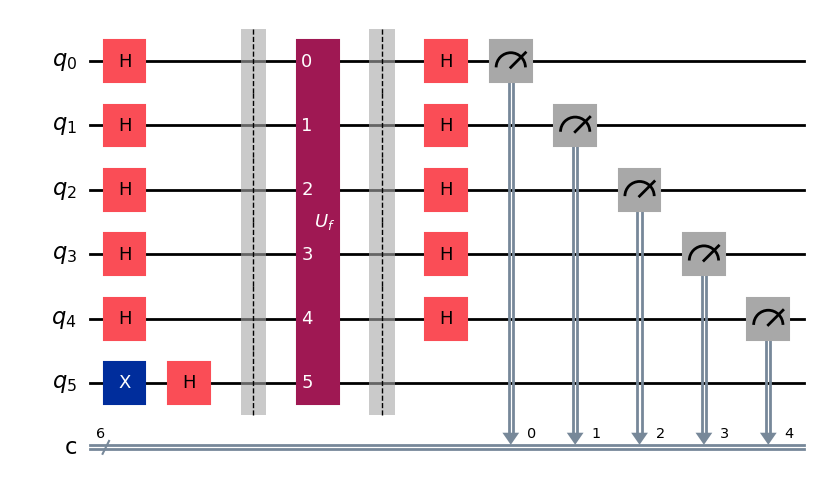

constant_1: {'000000': 100}


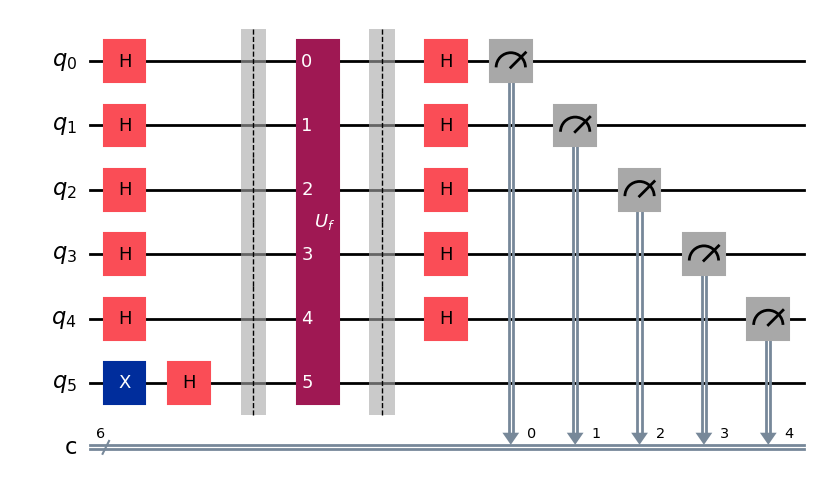

random_1: {'001111': 100}


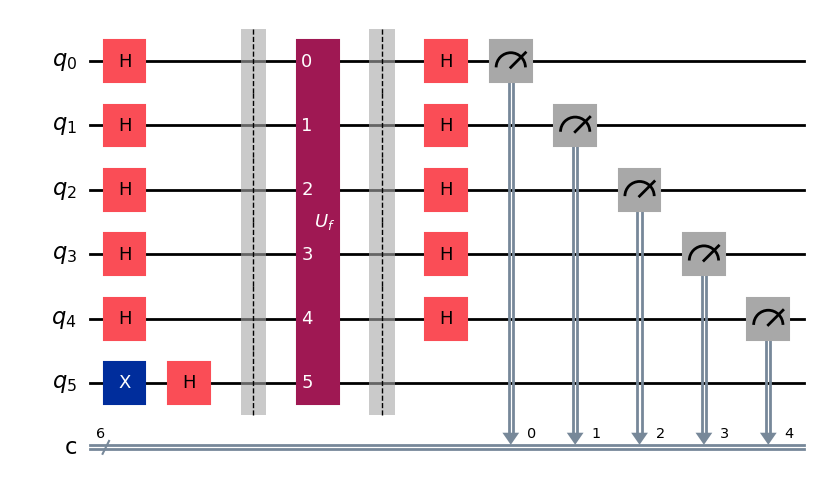

In [57]:
qubit_count = 6
# Test all oracles
oracles = {
    'constant_0': const_0(qubit_count),
    'constant_1': const_1(qubit_count),
    'random_1': balanced_dummy(qubit_count)
}

backend = AerSimulator()

for name, oracle in oracles.items():
    circuit = deutsch_jozsa(oracle, qubit_count)

    compiled_qc = transpile(circuit, backend)

    results = backend.run(compiled_qc, shots=100).result()
    counts = results.get_counts()

    print(f"{name}: {counts}")

    display(circuit.draw('mpl'))
